### Auto PSO (Particle Swarm Optimization) Algorithm
#### change inertia weight, cognitive & global coefficient as the iterations proceed

##### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Fitness Functions

- Sphere Function

In [2]:
def sphere( x):
	return np.sum( [ i ** 2 for i in x])

- Rastrigin Function

In [3]:
def rastr( x):
	return 10 * len( x) + np.sum( [ i ** 2 - 10 * np.cos( 2 * np.pi * i) for i in x])

In [4]:
def sigmoid_mapping( x, lower_bound, upper_bound):
    return lower_bound + ( upper_bound - lower_bound) / ( 1 + np.exp( -x))

##### PSO Function

In [5]:
# w_min: inertia weight (lower bound)
# w_max: inertia weight (upper bound)
# c1_min: cognitive coefficient (lower bound)
# c1_min: cognitive coefficient (upper bound)
# c2_min: global coefficient (lower bound)
# c2_max: global coefficient (upper bound)
# d: number of dimensions
# pn: number of particles
# domain: range of search space in every dimension
# n_iter: number of iterations
# tol: minimum value considered for value of fitness function
# fit: fitness function
def pso( w_min, w_max, c1_min, c1_max, c2_min, c2_max, d, pn, domain, n_iter, tol, fit):

    # position of particles. initial seed within [ -domain, domain]
    p = ( 2 * domain * np.random.rand( pn, d)) - domain

    # initial velocity
    v = np.zeros( ( pn, d))

    # best position of particle initiated with p ( initial location)
    pbest = np.copy( p)

    # value of fit function for each particle
    f = np.array( [ fit( i) for i in p])

    # best value of fit function for each particle
    # initiated with f ( initial value of fit function for each particle)
    fpbest = np.copy( f)

    # best value of fit function among all particles
    # and its corresponding location
    fgbest, gbest = f.min(), p[ f.argmin()]

    # variable for recording history of fgbest (best value of fit function)
    history = []
    
    # start with lower bound and increase it
    w = w_min

    # define domain of c1 and c2 and scale it to fit within a reasonable range for the sigmoid function
    t = np.arange( n_iter)
    scaled_t = ( t - np.min( t)) / ( np.max( t) - np.min( t)) * 10 - 5
    
    # decreasing curve of sigmoid for congitive coefficient
    c1s = sigmoid_mapping( scaled_t, c1_max, c1_min)

    # increasing curve of sigmoid for global coefficient
    c2s = sigmoid_mapping( scaled_t, c2_min, c2_max)

    # iterate n_iter times
    for i in range( n_iter):
        c1 = c1s[ i]
        c2 = c2s[ i]

        # record best fitness value
        history.append( fgbest)

        # stop the algorithm if optimum point is reached
        if fgbest <= tol:
            break

        # update particle velocities and positions
        r1 = np.random.rand( pn, d)
        r2 = np.random.rand( pn, d)
        v = ( w * v) + ( r1 * c1 * ( pbest - p)) + ( r2 * c2 * ( gbest - p))
        p = p + v

        # clip particle positions to the domain boundaries
        p = np.clip( p, -domain, domain)

        # update fitness values
        f = np.array( [ fit( i) for i in p])

        # update particles' best positions and fitness values
        indices = np.nonzero( f < fpbest)
        fpbest[ indices] = f[ indices]
        pbest[ indices] = p[ indices]

        # update global best position and fitness value
        if f.min() < fgbest:
            fgbest, gbest = f.min(), p[ f.argmin()]

        # update inertia weight
        w = w_max - ( ( w_max - w_min) * i / n_iter)

    return history, fgbest, gbest

##### Driver

Best Value: 0.9965813739426181
Best Params: [ 5.39994131e-05 -5.60658351e-06 -9.93066881e-01 -5.15103825e-05
 -2.14367138e-03]


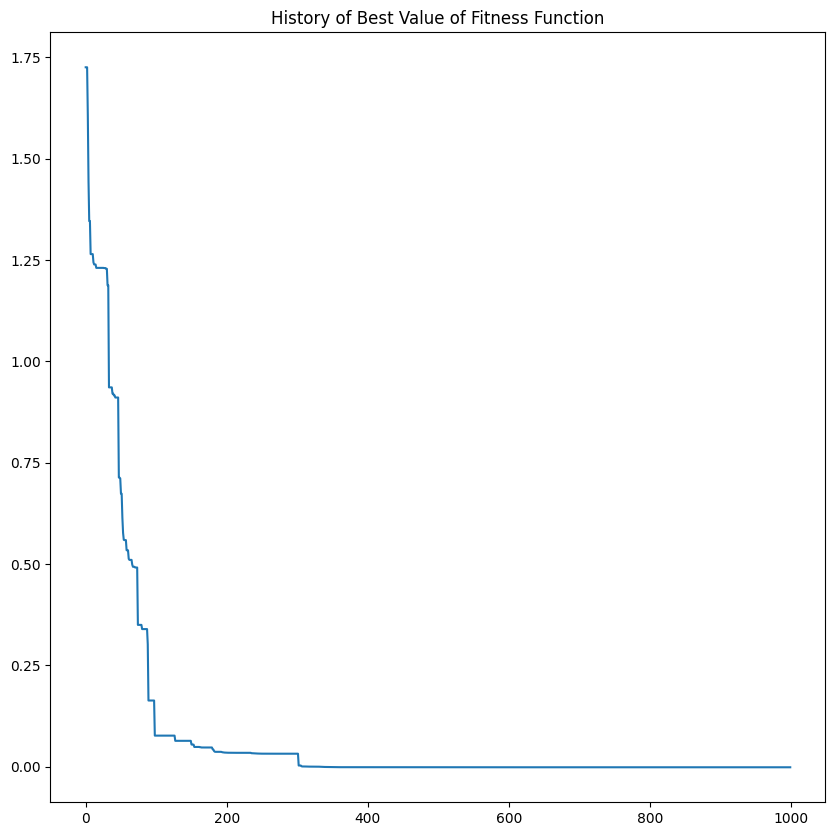

In [6]:
h, f, p = pso(
	w_min=0.5,
	w_max=0.9,
	c1_min=0.5,
	c1_max=2.0,
	c2_min=0.1,
	c2_max=2.0,
	d=5,
	pn=5,
	domain=1,
	n_iter=1000,
	tol=0,
	fit=rastr
)

print( f"Best Value: { f}")
print( f"Best Params: { p}")

plt.figure( figsize=( 10, 10))
plt.title( "History of Best Value of Fitness Function")
plt.plot( np.log10( h))
plt.show()